In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing the data set
df=pd.read_csv('restaurants_zlatestranky.csv',index_col=0)

In [40]:
df.head()

,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
0,Repre restaurant,Praha 1,0.0,0,"{'Po': '10:30 - 23', 'Út': '10:30 - 23', 'St':...","{'Po': 12.5, 'Út': 12.5, 'St': 12.5, 'Čt': 12....",rezervace@repre-restaurant.cz,{'Restaurace Praha 1': '+420 222 211 451'},http://www.repre-restaurant.cz,"['faktura', 'hotově', 'VISA', 'MASTERCARD', 'C...",['taneční parket'],"['česká kuchyně', 'mezinárodní kuchyně', 'neku...","['salónek', 'klimatizace', 'bezbariérový příst...","{'latitude': 50.08553, 'longitude': 14.42718}"
1,Restaurace Nad Ledem,Praha 10,100.0,1,"{'Po': '10 - 23', 'Út': '10 - 23', 'St': '10 -...","{'Po': 13.0, 'Út': 13.0, 'St': 13.0, 'Čt': 13....",nadledem@seznam.cz,{'Restaurace Praha 10': '+420 728 464 824'},https://restauracenadledem.cz/,"['hotově', 'faktura', 'MASTERCARD', 'VISA']","['Denní menu', 'Pivo z tanku', 'Točené limonád...","['Restaurace', 'Bezbariérový vstup', 'Letní za...","['Kofola', 'Birell', 'Pilsner Urquell']","{'latitude': 50.068558, 'longitude': 14.4777165}"
2,SRI LANKAN CURRY HOUSE,Praha 3,100.0,1,"{'Po': '11 - 22', 'Út': '11 - 22', 'St': '11 -...","{'Po': 11.0, 'Út': 11.0, 'St': 11.0, 'Čt': 11....",srilankancurryhouse@gmail.com,{'hlavní telefon': '+420 603 118 707'},https://srilankanrestaurant.cz/,"['hotově', 'faktura', 'VISA', 'MASTERCARD']","['polévky', 'předkrmy', 'zeleninové kari', 'pi...",['restaurace'],NaN,"{'latitude': 50.07646, 'longitude': 14.44919}"
3,Restaurace HOOTERS Vodičkova,Praha 2,0.0,0,"{'Po': '11 - 23', 'Út': '11 - 23', 'St': '11 -...","{'Po': 12.0, 'Út': 12.0, 'St': 12.0, 'Čt': 12....",vodickova@hooters.cz,{'Rezervace': '+420 602 799 222'},http://hooters.cz/cz/vodickova?utm_source=Mext...,"['American Express', 'VISA', 'hotově', 'faktur...","['předkrmy', 'polévky', 'quesadillas', 'burger...","['restaurace', 'sportovní přenosy', 'rozlučky ...","['HOOTERS', 'Pilsner Urquell', 'Coca Cola']","{'latitude': 50.078701, 'longitude': 14.421425}"
4,1. MEXICKÁ RESTAURACE,Praha 1,89.0,2,"{'Po': '11:30 - 23:59', 'Út': '11:30 - 23:59',...","{'Po': 12.48, 'Út': 12.48, 'St': 12.48, 'Čt': ...",NaN,{'hlavní telefon': '+420 257 317 173'},NaN,['hotově'],NaN,NaN,NaN,"{'latitude': 50.08294, 'longitude': 14.40461}"


In [49]:
district_counts=df.district.value_counts() #Currently administrative district => maybe should aggregate to municipal districts
district_counts

Praha 1     648
Praha       252
Praha 2     214
Praha 5     149
Praha 3     129
Praha 4     125
Praha 6     123
Praha 8     112
Praha 10    105
Praha 7      94
Praha 9      50
Praha 11     37
Praha 13     24
Praha 12     18
Praha 14     16
Praha 17     15
Praha 18     14
Praha 16     13
Praha 22     13
Praha 15     13
Praha 19     11
Praha 20      8
Praha 21      7
Praha 31      1
Name: district, dtype: int64

In [42]:
#Inspecting suspicious Prague 31
df[df.district=='Praha 31']

,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
1804,Starbucks coffee,Praha 31,0.0,0,"{'Po': '9 - 21', 'Út': '9 - 21', 'St': '9 - 21...","{'Po': 12.0, 'Út': 12.0, 'St': 12.0, 'Čt': 12....",NaN,{'hlavní telefon': '+420 235 013 311'},http://starbuckscoffee.cz,"['hotově', 'VISA', 'MASTERCARD', 'American Exp...","['Káva, čaj, nápoje, jídlo']",['Restaurace'],NaN,"{'latitude': 50.092522, 'longitude': 14.399834}"


In [24]:
#There is a "Praha 310" at the beginning of the address => need to resolve in Restaurant.py
#https://www.zlatestranky.cz/profil/H1799130
'Praha 310, 118 00 Praha 1-Hradčany'

'Praha 310, 118 00 Praha 1-Hradčany'

In [43]:
#inspecting 'Praha' without a number
df[df.district=='Praha']
#Slivenec = Praha 5
#Zbraslav = Praha 16
#Some addresses do not contain the district e.g. Karla Engliše 3211 (Praha 5)
#Troja = Praha 7
#Smíchov = Praha 5
#Uhříněves = Praha 22

#May want to try to convert the address with Praha only to appropriate municipal districts


,name,district,ratings,review_count,opening_hours,opening_hours_span,email_address,phones,web_page,payment_methods,products,services,marks,coordinates
23,Aleš Tománek,Praha,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 257 921 449'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 49.966218, 'longitude': 14.380475}"
29,Alois Filip,Praha,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 222 522 054'},http://www.merlin-pub.cz,NaN,NaN,NaN,NaN,"{'latitude': 50.016315, 'longitude': 14.354978}"
43,ANDĚL CITY,Praha,0.0,0,NaN,NaN,NaN,{'hlavní telefon': '+420 602 568 021'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.06998, 'longitude': 14.402194}"
57,ARENA RESTAURACE,Praha,0.0,0,NaN,NaN,catering@trojacatering.cz,{'hlavní telefon': '+420 603 107 964'},NaN,NaN,NaN,NaN,NaN,"{'latitude': 50.116847, 'longitude': 14.411346}"
71,ASTON Café Restaurant,Praha,0.0,0,NaN,NaN,rezervace@aston-cafe.cz,{'hlavní telefon': '+420 722 643 760'},http://www.aston-cafe.cz,NaN,NaN,NaN,NaN,"{'latitude': 50.0741598, 'longitude': 14.406274}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,Subway,Praha,0.0,0,"{'Po': '8 - 18', 'Út': '8 - 18', 'St': '8 - 18...","{'Po': 10.0, 'Út': 10.0, 'St': 10.0, 'Čt': 10....",NaN,{'Main': '+420 739 767 952'},https://restaurants.subway.com/cs/cesko/prague...,NaN,NaN,NaN,NaN,"{'latitude': 50.0848274230957, 'longitude': 14..."
2184,Subway,Praha,0.0,0,NaN,NaN,NaN,{'Main': '+420 775 402 976'},https://restaurants.subway.com/cs/ceska-republ...,NaN,NaN,NaN,NaN,"{'latitude': 50.026466369628906, 'longitude': ..."
2185,Subway,Praha,0.0,0,"{'Po': '8 - 18', 'Út': '8 - 18', 'St': '8 - 18...","{'Po': 10.0, 'Út': 10.0, 'St': 10.0, 'Čt': 10....",NaN,{'Main': '+420 604 777 595'},https://restaurants.subway.com/cs/ceska-republ...,NaN,NaN,NaN,NaN,"{'latitude': 50.08316421508789, 'longitude': 1..."
2186,Svatby Nebozízek,Praha,0.0,0,NaN,NaN,NaN,{'Main': '+420 602 312 582'},http://www.nebozizek.cz/,NaN,NaN,NaN,NaN,"{'latitude': 50.08199691772461, 'longitude': 1..."


In [4]:
df.district.replace(['Praha 11','Praha 12'],'Praha 4',inplace=True)
df.district.replace(['Praha 13','Praha 16','Praha 17'],'Praha 5',inplace=True)
df.district.replace(['Praha 14','Praha 18','Praha 19','Praha 20','Praha 21'],'Praha 9',inplace=True)
df.district.replace(['Praha 15','Praha 22'],'Praha 10',inplace=True)

In [5]:
district_counts=df.district.value_counts()
district_counts.pop('Praha') #Address without a district
district_counts.pop('Praha 31') #Incorrect number => issue needs to be resolved in Restaurant.py
district_counts

Praha 1     648
Praha 2     214
Praha 5     201
Praha 4     180
Praha 10    131
Praha 3     129
Praha 6     123
Praha 8     112
Praha 9     106
Praha 7      94
Name: district, dtype: int64

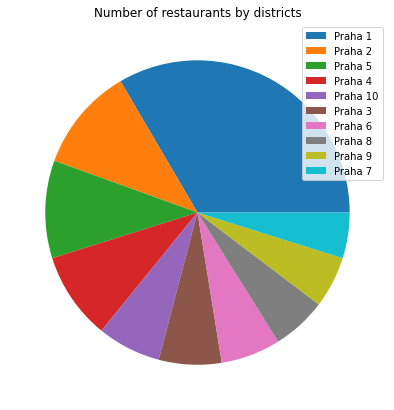

In [6]:
fig_size=plt.figure(figsize=(7,7))
district_pie=plt.pie(district_counts.values,labels=district_counts.index,labeldistance=None)
title=plt.title('Number of restaurants by districts')
legend=plt.legend()